In [ ]:
from matplotlib import pyplot as plt
from meta.rsi_custom_env import RsiCustomEnv
from utils.charts.plot_data_with_rsi import plot_data_with_rsi
from utils.fetch_data_with_indicators import Api, fetch_data_with_indicators
from stable_baselines3 import PPO
from stable_baselines3.common.env_checker import check_env

data = fetch_data_with_indicators(Api.YAHOO, 'BTC-USD', '2023-01-01', '2024-01-01', '1d', ['RSI'])

env = RsiCustomEnv(data, action_space=3, observation_space=6)
check_env(env)

model = PPO("MlpPolicy", env, verbose=1)
model.learn(total_timesteps=10_000, log_interval=1000)

[*********************100%***********************]  1 of 1 completed

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


[*********************100%***********************]  1 of 1 completed


Step: 1, Last Action: 0, Reward: -0.5, Total Reward: -0.5, Balance Before: 0, Balance: 10000, Token Amount: 0
Step: 2, Last Action: 0, Reward: -0.5, Total Reward: -1.0, Balance Before: 0, Balance: 10000, Token Amount: 0
Step: 3, Last Action: 0, Reward: -0.5, Total Reward: -1.5, Balance Before: 0, Balance: 10000, Token Amount: 0
Step: 4, Last Action: 0, Reward: -0.5, Total Reward: -2.0, Balance Before: 0, Balance: 10000, Token Amount: 0
Step: 5, Last Action: 0, Reward: -0.5, Total Reward: -2.5, Balance Before: 0, Balance: 10000, Token Amount: 0
Step: 6, Last Action: 1, Reward: -0.01, Total Reward: -2.51, Balance Before: 0, Balance: 10000, Token Amount: 0
Step: 7, Last Action: 0, Reward: -0.5, Total Reward: -3.01, Balance Before: 0, Balance: 10000, Token Amount: 0
Step: 8, Last Action: 1, Reward: -0.01, Total Reward: -3.0199999999999996, Balance Before: 0, Balance: 10000, Token Amount: 0
Step: 9, Last Action: 0, Reward: 5, Total Reward: 1.9800000000000004, Balance Before: 0, Balance: 900

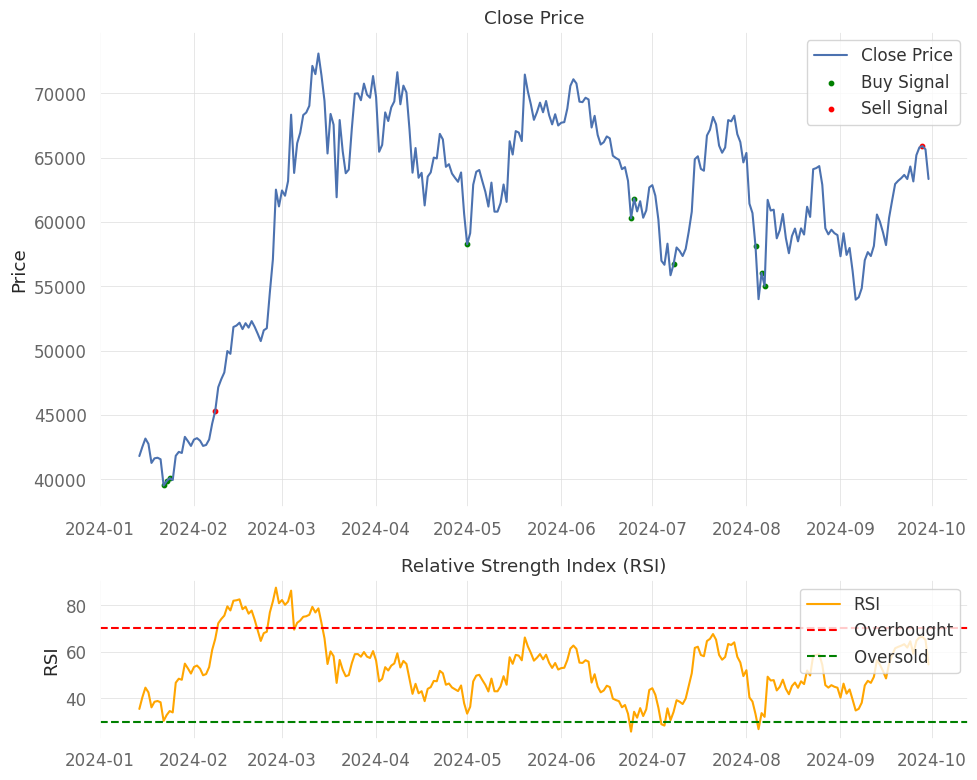

                    Strategy
------------------  ----------
Start Period        2024-01-14
End Period          2024-09-29
Risk-Free Rate      0.0%
Time in Market      65.0%

Cumulative Return   10.65%
CAGR﹪              10.35%

Sharpe              0.85
Prob. Sharpe Ratio  81.52%
Sortino             1.4
Sortino/√2          0.99
Omega               1.24

Max Drawdown        -8.82%
Longest DD Days     83

Gain/Pain Ratio     0.24
Gain/Pain (1M)      2.61

Payoff Ratio        1.17
Profit Factor       1.24
Common Sense Ratio  1.4
CPC Index           0.74
Tail Ratio          1.13
Outlier Win Ratio   7.08
Outlier Loss Ratio  3.76

MTD                 7.67%
3M                  6.29%
6M                  6.71%
YTD                 10.65%
1Y                  10.65%
3Y (ann.)           10.35%
5Y (ann.)           10.35%
10Y (ann.)          10.35%
All-time (ann.)     10.35%

Avg. Drawdown       -1.92%
Avg. Drawdown Days  17
Recovery Factor     1.24
Ulcer Index         0.02
Serenity Index      0.86


findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.


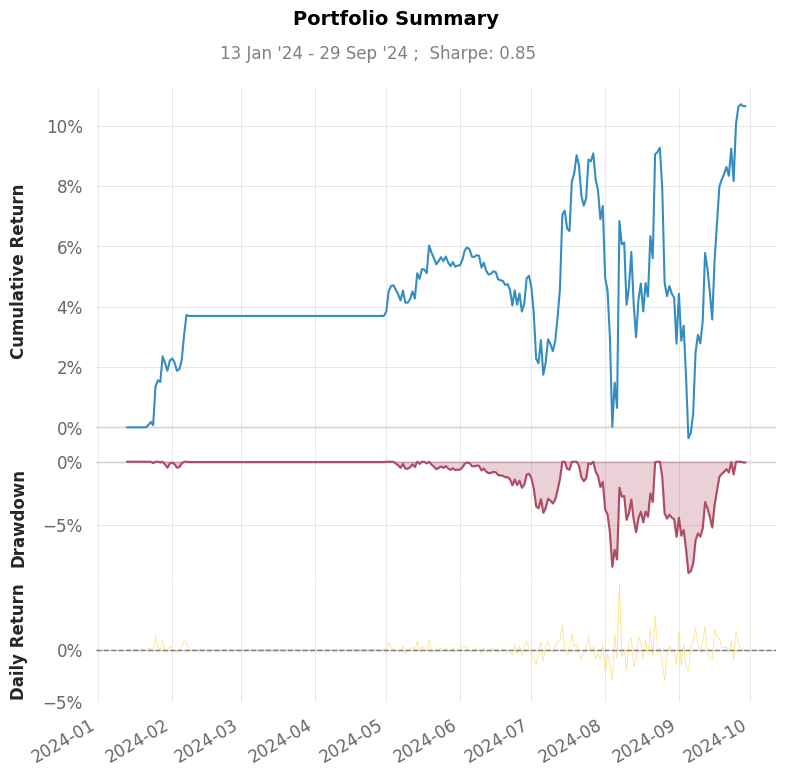

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.


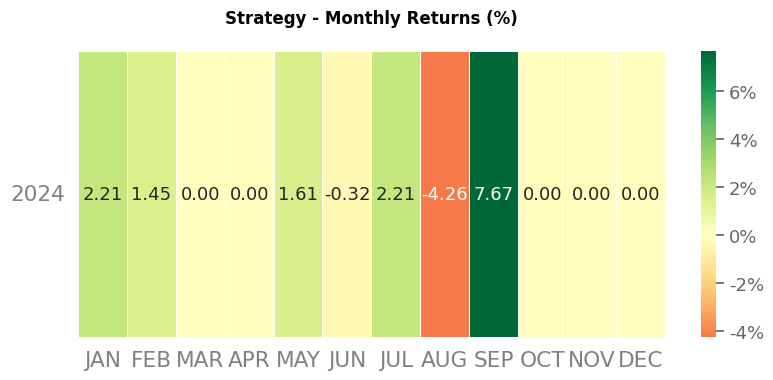

In [ ]:
import pandas as pd
import quantstats as qs

test_data = fetch_data_with_indicators(Api.YAHOO, 'BTC-USD', '2024-01-01', '2024-10-01', '1d', ['RSI'])

test_env = RsiCustomEnv(test_data, action_space=3, observation_space=6)
check_env(test_env)

portfolio_values = []

observation, info = test_env.reset()

while True:
    action, _states = model.predict(observation)

    observation, reward, terminated, truncated, info = test_env.step(action)
    test_env.render()
    done = terminated or truncated
    portfolio_values.append(info['portfolio_value'])

    if done:
        break

actions_data = test_env.close()
actions_data.index = pd.to_datetime(test_data.index)

plot_data_with_rsi(actions_data)

dates = pd.date_range(start=test_data.index[0], periods=len(portfolio_values), freq="D")
portfolio_series = pd.Series(portfolio_values, index=dates)

returns = portfolio_series.pct_change().fillna(0)

qs.reports.basic(returns)